In [2]:
# import sys
# !{sys.executable} -m pip install imblearn

    100% |████████████████████████████████| 174kB 10.6MB/s ta 0:00:01
    100% |████████████████████████████████| 10.6MB 2.9MB/s eta 0:00:01
    100% |████████████████████████████████| 286kB 9.5MB/s eta 0:00:01
  Found existing installation: scikit-learn 0.19.1
    Uninstalling scikit-learn-0.19.1:
      Successfully uninstalled scikit-learn-0.19.1
You are using pip version 18.1, however version 19.1.1 is available.
You should consider upgrading via the 'pip install --upgrade pip' command.


In [3]:
import pandas as pd
import numpy as np
from scipy import stats
import seaborn as sns
import matplotlib.pyplot as plt
from imblearn.over_sampling import SMOTE
from sklearn.model_selection import train_test_split
%matplotlib inline

/anaconda3/lib/python3.6/site-packages/sklearn/externals/six.py:31: DeprecationWarning: The module is deprecated in version 0.21 and will be removed in version 0.23 since we've dropped support for Python 2.7. Please rely on the official version of six (https://pypi.org/project/six/).
  "(https://pypi.org/project/six/).", DeprecationWarning)


### Input raw data 

There are a few steps to explore and wrangle the data into shape. First we'll just input the CSV and make sure it looks the way it should. 

In [5]:
data_total= pd.read_csv('data/all_years.csv',header=0)
data_total.head()

/anaconda3/lib/python3.6/site-packages/IPython/core/interactiveshell.py:2785: DtypeWarning: Columns (0,1,2,5,6,8,9,10,12,13,17,18,19,21,22,24,28,29,30,34,35,37,38,41,42,43,47,48,50,54,55,56,57,58,61) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


,Attr1,Attr2,Attr3,Attr4,Attr5,Attr6,Attr7,Attr8,Attr9,Attr10,...,Attr56,Attr57,Attr58,Attr59,Attr60,Attr61,Attr62,Attr63,Attr64,class
0,0.20055,0.37951,0.39641,2.0472,32.351,0.38825,0.24976,1.3305,1.1389,0.50494,...,0.12196,0.39718,0.87804,0.001924,8.416,5.1372,82.658,4.4158,7.4277,0
1,0.20912,0.49988,0.47225,1.9447,14.786,0,0.25834,0.99601,1.6996,0.49788,...,0.1213,0.42002,0.853,0,4.1486,3.2732,107.35,3.4,60.987,0
2,0.24866,0.69592,0.26713,1.5548,-1.1523,0,0.30906,0.43695,1.309,0.30408,...,0.24114,0.81774,0.76599,0.69484,4.9909,3.951,134.27,2.7185,5.2078,0
3,0.081483,0.30734,0.45879,2.4928,51.952,0.14988,0.092704,1.8661,1.0571,0.57353,...,0.054015,0.14207,0.94598,0,4.5746,3.6147,86.435,4.2228,5.5497,0
4,0.18732,0.61323,0.2296,1.4063,-7.3128,0.18732,0.18732,0.6307,1.1559,0.38677,...,0.13485,0.48431,0.86515,0.12444,6.3985,4.3158,127.21,2.8692,7.898,0


### Clean odd characters 

There are a few question marks throughout the dataset. We can see that when 1 occurs, it tends to proliferate throughout the entire row. So let's just remove those rows. 

In [6]:
#converting strings to float and identifying "?"
class UnknownCharReplacer(object):
    
    def __init__(self):
        self.unknown_char = set()        
        
    def str_to_float2(self, x):
        ret = 0
        # unknown_char = set()
        try:
            ret = float(x)
        except:
            self.unknown_char.add(x)
        return(ret)

In [7]:
replacer = UnknownCharReplacer()
refined_data = data_total.applymap(replacer.str_to_float2)

In [8]:
replacer.unknown_char

{'?'}

### Feature Names 

The features in this dataset are annoyingly labeled 'Attr1' etc. Let's keep a list to make sure we can understand the corrlation results. 

In [21]:
feature_names = ['net profit / total assets', 
'total liabilities / total assets', 
'working capital / total assets', 
'current assets / short-term liabilities', 
'[(cash + short-term securities + receivables - short-term liabilities) / (operating expenses - depreciation)] * 365', 
'retained earnings / total assets', 
'EBIT / total assets', 
'book value of equity / total liabilities', 
'sales / total assets', 
'equity / total assets', 
'(gross profit + extraordinary items + financial expenses) / total assets', 
'gross profit / short-term liabilities', 
'(gross profit + depreciation) / sales', 
'(gross profit + interest) / total assets', 
'(total liabilities * 365) / (gross profit + depreciation)', 
'(gross profit + depreciation) / total liabilities', 
'total assets / total liabilities', 
'gross profit / total assets', 
'gross profit / sales', 
'(inventory * 365) / sales', 
'sales (n) / sales (n-1)', 
'profit on operating activities / total assets', 
'net profit / sales', 
'gross profit (in 3 years) / total assets', 
'(equity - share capital) / total assets', 
'(net profit + depreciation) / total liabilities', 
'profit on operating activities / financial expenses', 
'working capital / fixed assets', 
'logarithm of total assets', 
'(total liabilities - cash) / sales', 
'(gross profit + interest) / sales', 
'(current liabilities * 365) / cost of products sold', 
'operating expenses / short-term liabilities', 
'operating expenses / total liabilities', 
'profit on sales / total assets', 
'total sales / total assets', 
'(current assets - inventories) / long-term liabilities', 
'constant capital / total assets', 
'profit on sales / sales', 
'(current assets - inventory - receivables) / short-term liabilities', 
'total liabilities / ((profit on operating activities + depreciation) * (12/365))', 
'profit on operating activities / sales', 
'rotation receivables + inventory turnover in days', 
'(receivables * 365) / sales', 
'net profit / inventory', 
'(current assets - inventory) / short-term liabilities', 
'(inventory * 365) / cost of products sold', 
'EBITDA (profit on operating activities - depreciation) / total assets', 
'EBITDA (profit on operating activities - depreciation) / sales', 
'current assets / total liabilities', 
'short-term liabilities / total assets', 
'(short-term liabilities * 365) / cost of products sold)', 
'equity / fixed assets', 
'constant capital / fixed assets', 
'working capital', 
'(sales - cost of products sold) / sales', 
'(current assets - inventory - short-term liabilities) / (sales - gross profit - depreciation)', 
'total costs /total sales', 
'long-term liabilities / equity', 
'sales / inventory', 
'sales / receivables', 
'(short-term liabilities *365) / sales', 
'sales / short-term liabilities', 
'sales / fixed assets']


In [30]:
## Function to reveal feature names

def feature_name(st): 
    i = int(st.strip('Attr'))
    return feature_names[i-1]

In [33]:
st = 'Attr14'
feature_name(st)

'(gross profit + interest) / total assets'

In [38]:
cut_cols = ['Attr3', 'Attr6', 'Attr8', 'Attr10', 'Attr11', 'Attr14'] 
[print(feature_name(f)) for f in cut_cols]

working capital / total assets
retained earnings / total assets
book value of equity / total liabilities
equity / total assets
(gross profit + extraordinary items + financial expenses) / total assets
(gross profit + interest) / total assets


[None, None, None, None, None, None]

### Correlated Variables 

This dataset has LOTS of highly related columns. Since we're using a deep learning model, we probably don't need to worry much about that, but let's explore just in case. 

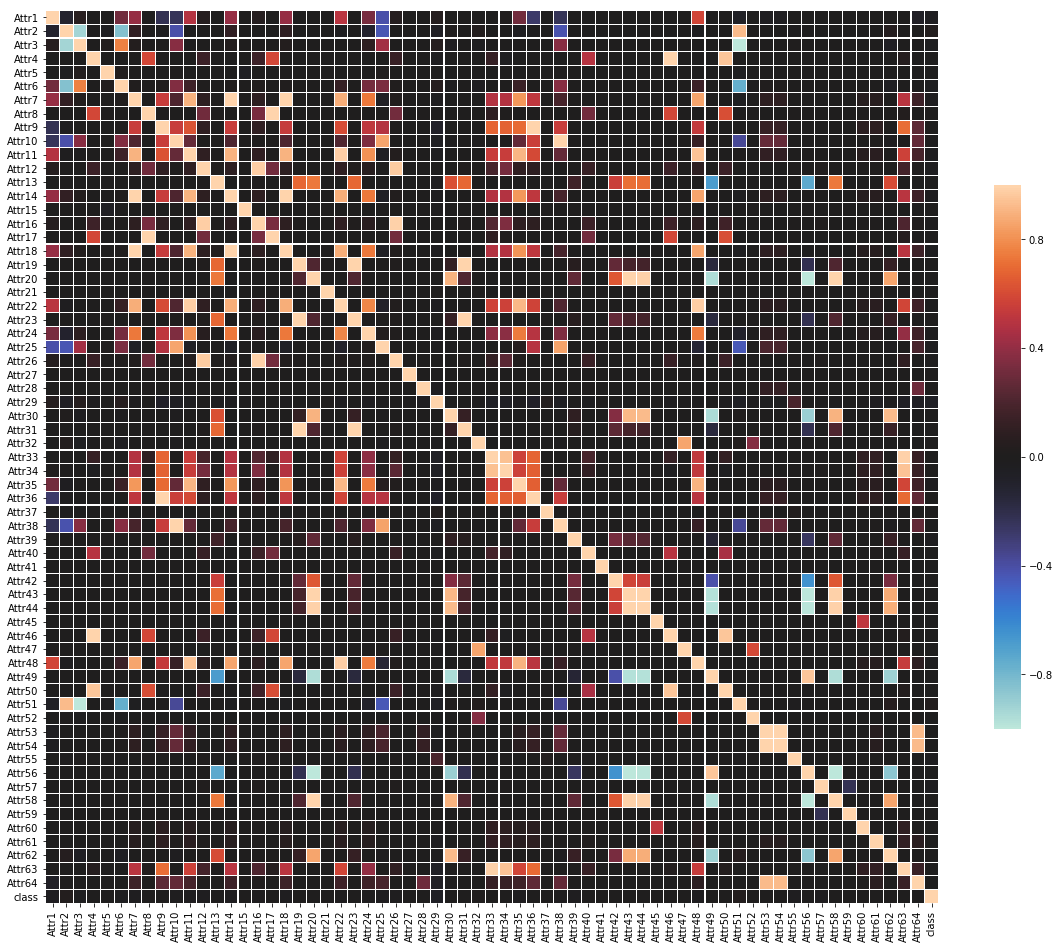

In [11]:
#Creating heatmap to detect Multicollinearity
def correlation_heatmap(train):
    correlations = train.corr()

    fig, ax = plt.subplots(figsize=(20,20))
    sns.heatmap(correlations, vmax=1.0, center=0, fmt='.2f',
                square=True, linewidths=.1, annot=False, cbar_kws={"shrink": .50})
    plt.show();
    
correlation_heatmap(refined_data)

In [247]:
# corr_matrix = refined_data.corr().abs()
# corr_matrix.loc[:,:] = np.tril(corr_matrix, k=-1) # below main lower triangle of an array
# cor = corr_matrix.stack()
# cor[(cor > 0.55) | (cor < -0.55)]

In [13]:
#Identify Multicollinearity columns and dropping them from the data base

# Create correlation matrix
corr_matrix = refined_data.corr().abs()

# Select upper triangle of correlation matrix
upper = corr_matrix.where(np.triu(np.ones(corr_matrix.shape), k=1).astype(np.bool))

# Find index of feature columns with correlation greater than 0.95
to_drop = [column for column in upper.columns if any(upper[column] > 0.55)]
refined_data.drop(to_drop, axis=1, inplace=True)

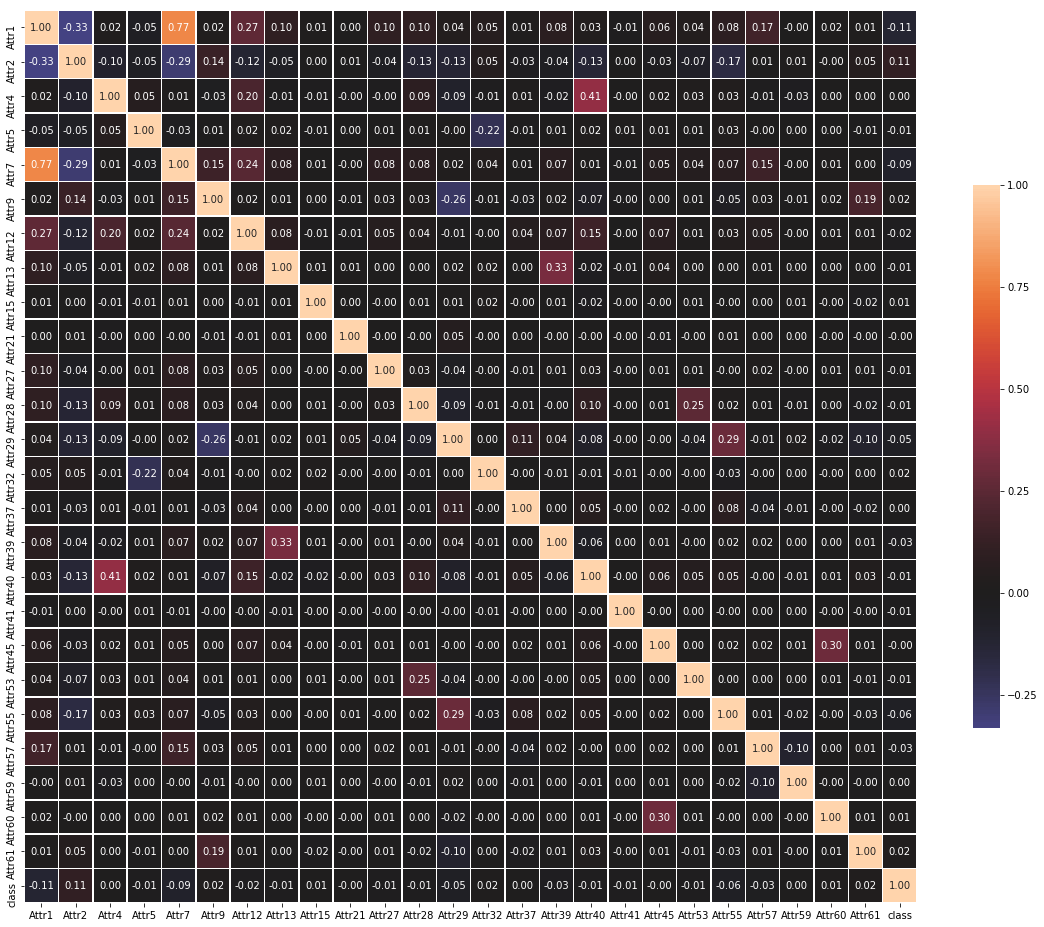

In [37]:
#Create heatmap to double check Multicollinearity

def correlation_heatmap(train):
    correlations = train.corr()

    fig, ax = plt.subplots(figsize=(20,20))
    sns.heatmap(correlations, vmax=1.0, center=0, fmt='.2f',
                square=True, linewidths=.5, annot=True, cbar_kws={"shrink": .50})
    plt.show();
    
correlation_heatmap(refined_data)

### Remove outliers 

Another way to deal with model performance is to try to remove or address outlier data. This can be dangerous, but let's see whether it will make a difference for our model. In this case, we'll just derive a z-score and use that to identify and replace with average values. 

In [34]:
#removing outliers using z-score
outlier_data = refined_data.drop(columns='class')
z = np.abs(stats.zscore(outlier_data))
print(z)

[[0.58668223 0.28108526 0.08778169 ... 0.0480524  0.06413143 0.17353245]
 [0.62234304 0.05171223 0.09335444 ... 0.04834788 0.0684598  0.22084506]
 [0.78687378 0.32185503 0.11455263 ... 0.05836077 0.06760546 0.20364094]
 ...
 [0.99287948 1.38779082 0.15855071 ... 0.12857901 0.06267431 0.21536248]
 [0.70081037 0.41336034 0.13994262 ... 0.88728012 0.05858329 0.1496807 ]
 [0.68628805 0.01766945 0.14934942 ... 0.04785706 0.06482399 0.18418794]]


In [16]:
#replacing the outliers with mean 
threshold = 3
rows = np.where(z > threshold)[0]
columns = np.where(z > threshold)[1]
outlier_index = list(zip(rows,columns))
    
#changing the outliers to None
for i in outlier_index:
     refined_data.iloc[i[0]][i[1]] = np.nan
refined_data.fillna(refined_data.mean(), inplace=True)     

### Balance

This is a *really* unbalanced dataset. Let's try to fix that with the `SMOTE` function. 

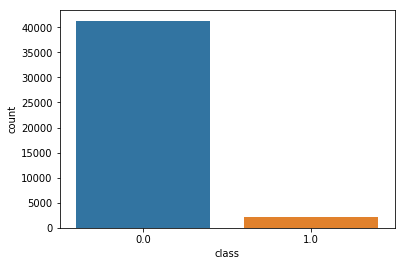

In [17]:
#showing dataset is imbalanced
sns.countplot(refined_data['class'])

#Creating train and test dataset
y = refined_data['class'].values
X = refined_data.drop(['class'], axis=1).values
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state=0)

In [19]:
#Balance the dataset
sm = SMOTE(ratio = 1.0)
X_resampled,y_resampled = sm.fit_sample(X_train, y_train)

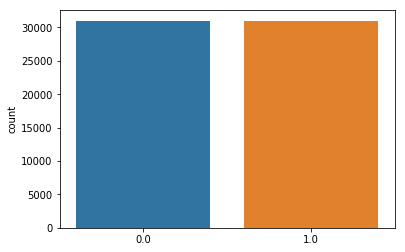

In [20]:
# Check balance result 
sns.countplot(y_resampled)


In [256]:
refined_data.columns

Index(['Attr1', 'Attr2', 'Attr4', 'Attr5', 'Attr7', 'Attr9', 'Attr12',
       'Attr13', 'Attr15', 'Attr21', 'Attr27', 'Attr28', 'Attr29', 'Attr32',
       'Attr37', 'Attr39', 'Attr40', 'Attr41', 'Attr45', 'Attr53', 'Attr55',
       'Attr57', 'Attr59', 'Attr60', 'Attr61', 'class'],
      dtype='object')

In [257]:
X_resampled.shape

(62008, 25)

In [237]:
type(X_resampled)

numpy.ndarray